# https://github.com/must4in3/pix2pix

In [1]:
import tensorflow as tf
#import os
#import time
from matplotlib import pyplot as plt
#from IPython import display
from src.generator_functions import downsample, upsample, Generator, generator_loss
from src.Image_processing_functions import load

In [2]:
inp, re = load('images/facades/train/100.jpg')

# Generator

**Build the Generator <br>
The architecture of generator is a modified U-Net.<br>**
U-Net is a convolutional neural network that was developed for biomedical image segmentation at the Computer Science Department of the University of Freiburg, Germany.[1] The network is based on the fully convolutional network[2] and its architecture was modified and extended to work with fewer training images and to yield more precise segmentations. Segmentation of a 512 × 512 image takes less than a second on a modern GPU.<br>
**Each block in the encoder is (Conv -> Batchnorm -> Leaky ReLU)**<br>
Un'immagine di partenza può essere trasformata ottenendo un particolare effetto applicando ad essa una maschera di convoluzione, cioè una serie di numeri rappresentati spesso da una matrice. Pensate all'operazione di convoluzione come all'applicazione di un filtro su un qualsivoglia programma di computer grafica, dove i filtri stessi sono le maschere di convoluzione. 
e maschere di convoluzione possono essere interpretate come feature detector, cioè come degli strumenti che ci permettono di comprendere i dettagli di un'immagine, come quanto rosso c'è, quante e quali sono le fonti di luce o com'è il rapporto di contrasto. Se prendiamo un'immagine di input e ad essa applichiamo una determinata maschera di convoluzione, potremmo ottenere un'immagine risultate in cui la funzionalità che vogliamo analizzare viene isolata: se vogliamo capire dove sono i punti più scuri in una foto, allora avremmo un'immagine risultante che risulterà di fatto essere un mappa dei toni scuri.<br>
**Batch Normalizacion cosa é?**<br>
velocizzare il training delle reti neurali e migliorarne le performance: i risultati sono incredibili !
L’intuizione da cui nasce la BN è abbastanza semplice: il training delle reti neurali viene rallentano da un fenomeno noto come internal covariate shift.
Ovvero, durante la fase di training, i parametri di ogni sub-strato della rete neurale vengono ottimizzati, affinchè l’errore finale prodotto dalla rete sia minimizzato, iterazione dopo iterazione; ad ogni iterazione, dunque, l’output di ogni sub-strato (che è l’input del sub-strato successivo) varia. Con internal covariate shift ci si riferisce proprio al fatto che ogni strato della rete, ad ogni iterazione, viene esposto ad un input completamente diverso rispetto all’iterazione precedente.
Il cambiamento degli input ad ogni strato rappresenta un problema perchè gli strati della rete devono continuamente adattarsi ad una nuova distribuzione dei valori di ingresso, quindi, per migliorare la fase di training, occorre fissare questa distribuzione.
La soluzione consiste nel normalizzare gli input della rete ad ogni sub-strato della rete stessa (viene chiamata Batch Normalization perchè media e varianza sono calcolati sui valori del batch/gruppo corrente di input).<br>
**ReLU**<br>
Nel contesto delle reti neurali artificiali, il rettificatore è una funzione di attivazione 

**Each block in the decoder is (Transposed Conv -> Batchnorm -> Dropout(applied to the first 3 blocks) -> ReLU)<br>
**Transposed Con** <br>
Quando trasponiamo le convoluzioni, cambiamo l'ordine delle dimensioni in questa matrice di operazioni di convoluzione, che ha alcuni effetti interessanti e porta a comportamenti diversi rispetto alle convoluzioni regolari di cui abbiamo appreso finora.<br>
**dropout**<br>
La tecnica di dropout invece funziona diversamente, in quanto modifica non la funzione di costo della rete, ma la rete stessa. Abbiamo visto il principio di funzionamento di una rete neurale e come essa riesca ad allenarsi. Ecco, questa tecnica prevede di applicare il solito procedimento togliendo prima una certa percentuale di neuroni in ogni hidden layer! Per ogni epoca di allenamento si sceglie (casualmente) quali neuroni tenere e quali scartare e si allena la rete così ottenuta. <br>
**There are skip connections between the encoder and decoder (as in U-Net).**<br>

In [3]:
down_model = downsample(3, 4)
# tf.expand_dims: Returns a tensor with an additional dimension inserted at index axis.
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

(1, 128, 128, 3)


In [4]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 3)


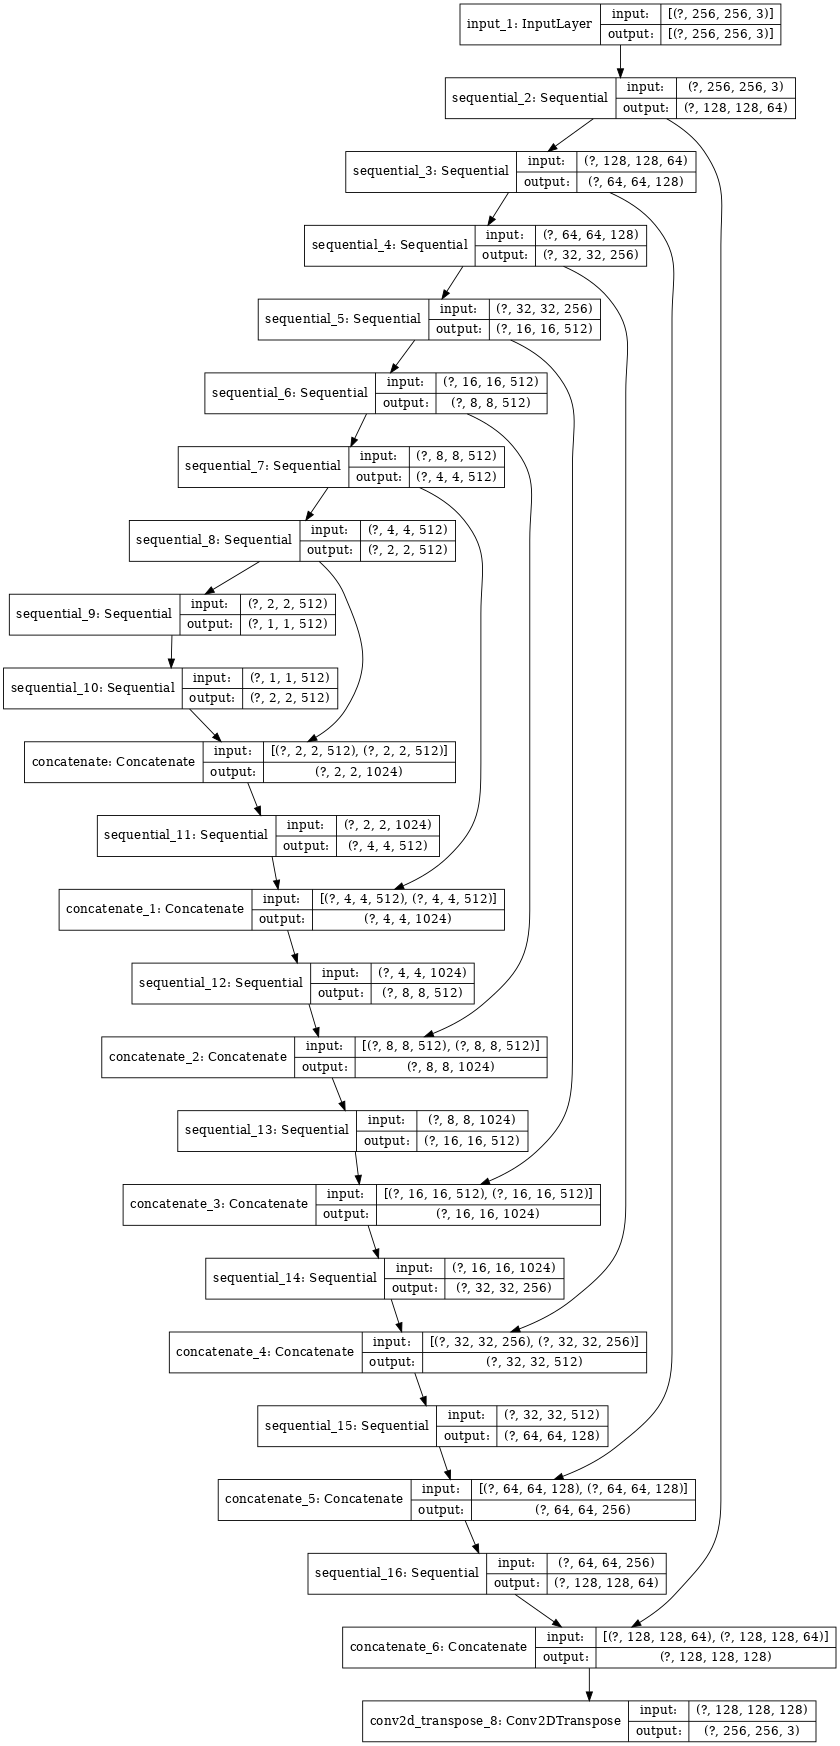

In [5]:
# Generator function defines the architecture of our Generator.
# The architecture of generator is a modified U-Net.
#   Each block in the encoder is (Conv -> Batchnorm -> Leaky ReLU)
#   Each block in the decoder is (Transposed Conv -> Batchnorm -> Dropout(applied to the first 3 blocks) -> ReLU)
#   There are skip connections between the encoder and decoder (as in U-Net).
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


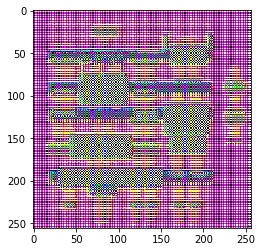

In [6]:
gen_output = generator(inp[tf.newaxis,...], training=False)
# ejemplo del output del generador
plt.imshow(gen_output[0,...])

# Generator loss


It is a sigmoid cross entropy loss of the generated images and an array of ones.
The paper also includes L1 loss which is MAE (mean absolute error) between the generated image and the target image.
This allows the generated image to become structurally similar to the target image.
The formula to calculate the total generator loss = gan_loss + LAMBDA * l1_loss, where LAMBDA = 100. This value was decided by the authors of the paper.
The training procedure for the generator is shown below:

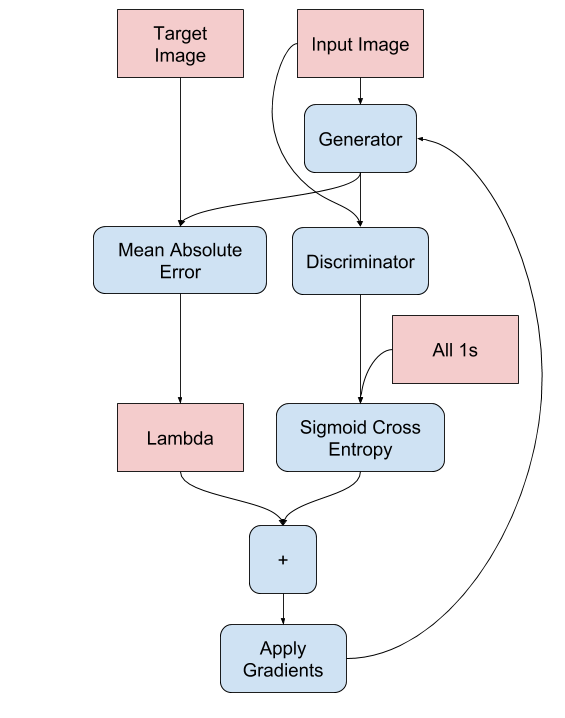